In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import random

In [8]:
path = os.getcwd() + '/historical_price'
stock08 = []
for file in os.listdir(path):
    file_path = path + '/' + file
    date = pd.read_csv(file_path)['t']
    if len(date)>0:
        stock08.append(file)
print(str(len(stock08))+" stocks selected")
print(stock08)


86 stocks selected
['SLB_2015-12-30_2021-02-21_minute.csv', 'XOM_2018-09-05_2021-02-21_minute.csv', 'CME_2015-12-30_2021-02-21_minute.csv', 'MPC_2015-12-30_2021-02-21_minute.csv', 'V_2018-09-05_2021-02-21_minute.csv', 'MCD_2018-09-05_2021-02-21_minute.csv', 'LUV_2015-12-30_2021-02-21_minute.csv', 'AVGO_2015-12-30_2021-02-21_minute.csv', 'PFE_2018-09-05_2021-02-21_minute.csv', 'TGT_2015-12-30_2021-02-21_minute.csv', 'TWTR_2015-12-30_2021-02-21_minute.csv', 'CVX_2015-12-30_2021-02-21_minute.csv', 'GOOGL_2015-12-30_2021-02-21_minute.csv', 'DIS_2018-09-05_2021-02-21_minute.csv', 'EBAY_2015-12-30_2021-02-21_minute.csv', 'QCOM_2015-12-30_2021-02-21_minute.csv', 'MRK_2018-09-05_2021-02-21_minute.csv', 'TSLA_2015-12-30_2021-02-21_minute.csv', 'CBOE_2015-12-30_2021-02-21_minute.csv', 'BIIB_2015-12-30_2021-02-21_minute.csv', 'GOOG_2015-12-30_2021-02-21_minute.csv', 'HD_2018-09-05_2021-02-21_minute.csv', 'TSN_2015-12-30_2021-02-21_minute.csv', 'HPQ_2015-12-30_2021-02-21_minute.csv', 'F_2015-12-30

In [56]:
stock_price_dict = {}

for file in stock08 :
    path = os.getcwd() + '/historical_price/' + file
    df = pd.read_csv(path)
    df['t'] = pd.to_datetime(df['t'], utc = True)
    df = df[df.t >= '2018-09-10']
    df = df.set_index(pd.DatetimeIndex(df['t']))
    df['c'] = df.c.resample('D').mean()
    stock_price_dict[file.split("_")[0]] = df['c']

# market_path = "C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/SP500_index.csv"
# df = pd.read_csv(market_path)
# pd.to_datetime(df['Date'], format='%Y-%m-%d')
# df = df.set_index(pd.DatetimeIndex(df['Date']))
# stock_price_dict['SP500'] = df['Adj Close']
    
stock_price_df = pd.DataFrame(stock_price_dict)


In [57]:
print(stock_price_df.head())

                           SLB  XOM  CME  MPC   V  MCD  LUV  AVGO  PFE  TGT  \
t                                                                             
2018-09-10 08:00:00+00:00  NaN  NaN  NaN  NaN NaN  NaN  NaN   NaN  NaN  NaN   
2018-09-10 08:01:00+00:00  NaN  NaN  NaN  NaN NaN  NaN  NaN   NaN  NaN  NaN   
2018-09-10 08:03:00+00:00  NaN  NaN  NaN  NaN NaN  NaN  NaN   NaN  NaN  NaN   
2018-09-10 08:05:00+00:00  NaN  NaN  NaN  NaN NaN  NaN  NaN   NaN  NaN  NaN   
2018-09-10 08:06:00+00:00  NaN  NaN  NaN  NaN NaN  NaN  NaN   NaN  NaN  NaN   

                           ...  UNH  REGN  ABBV  SO  COP  GE  AXP  NKE   T  \
t                          ...                                               
2018-09-10 08:00:00+00:00  ...  NaN   NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
2018-09-10 08:01:00+00:00  ...  NaN   NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
2018-09-10 08:03:00+00:00  ...  NaN   NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
2018-09-10 08:05:00+00:00  ...  NaN   NaN   NaN NaN  NaN

In [58]:
NA_col = []
NA_ratio = []
for col in stock_price_df.columns :
    na_index = np.where(stock_price_df[col].isnull())[0]
    NA_col.append(col)
    NA_ratio.append(len(na_index)/stock_price_df.shape[0] * 100)
    print(col,na_index)
NA_df = pd.DataFrame({'tickers':NA_col,'NA_ratio':NA_ratio})

SLB [     0      1      2 ... 565728 565729 565730]
XOM [     0      1      2 ... 565728 565729 565730]
CME [     0      1      2 ... 565728 565729 565730]
MPC [     0      1      2 ... 565728 565729 565730]
V [     0      1      2 ... 565728 565729 565730]
MCD [     0      1      2 ... 565728 565729 565730]
LUV [     0      1      2 ... 565728 565729 565730]
AVGO [     0      1      2 ... 565728 565729 565730]
PFE [     0      1      2 ... 565728 565729 565730]
TGT [     0      1      2 ... 565728 565729 565730]
TWTR [     0      1      2 ... 565728 565729 565730]
CVX [     0      1      2 ... 565728 565729 565730]
GOOGL [     0      1      2 ... 565728 565729 565730]
DIS [     0      1      2 ... 565728 565729 565730]
EBAY [     0      1      2 ... 565728 565729 565730]
QCOM [     0      1      2 ... 565728 565729 565730]
MRK [     0      1      2 ... 565728 565729 565730]
TSLA [     0      1      2 ... 565728 565729 565730]
CBOE [     0      1      2 ... 565728 565729 565730]
BIIB [

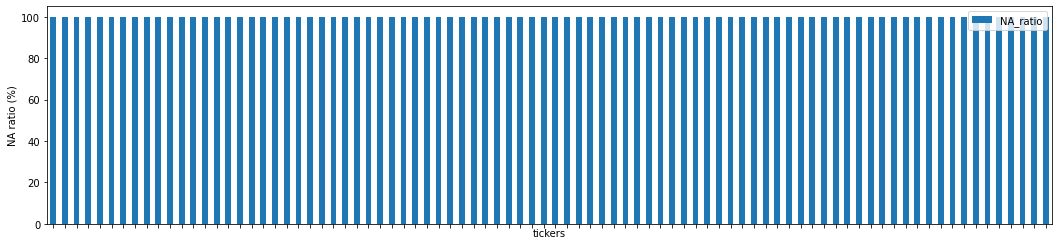

In [59]:
NA_df.plot.bar(rot=0, figsize=(18,4))
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.xlabel('tickers')
plt.ylabel('NA ratio (%)')
plt.show()
plt.close()